#### Importing packages

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import networkx as nx

#### Reading fragebogen information

In [50]:
fragebogen = pd.read_csv('./fragebogen.csv', names=["id",
                                                    "nummer", 
                                                    "titel", 
                                                    "schlagwoerter", 
                                                    "erscheinungsjahr",
                                                    "autoren", 
                                                    "originaldaten",
                                                    "anmerkung",
                                                    "freigabe",
                                                    "checked",
                                                    "wordleiste",
                                                    "druck",
                                                    "online",
                                                    "publiziert",
                                                    "fragebogen_typ_id",])

fragebogen.drop(["id","schlagwoerter","erscheinungsjahr","autoren","originaldaten","anmerkung","freigabe",
                 "checked","wordleiste","druck","online","publiziert","fragebogen_typ_id",], inplace=True, axis=1)

fragebogen.set_index("nummer", drop=True, inplace=True)

In [51]:
fragebogen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 1 to ETir.28
Data columns (total 1 columns):
titel    762 non-null object
dtypes: object(1)
memory usage: 11.9+ KB


In [52]:
fragebogen.head()

,titel
nummer,
1,Fragebogen 1: Kopf (1)
2,Fragebogen 2: Die Osterwoche (1)
3,Fragebogen 3: Die Osterwoche (2)
4,Fragebogen 4: Kopf (2)
5,Fragebogen 5: Zeit zwischen Ostern und Fronlei...


In [53]:
fragebogen.tail()

,titel
nummer,
ETir.24,24. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.25,25. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.26,26. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.27,27. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.28,28. Ergänzungsfragebogen zum Tiroler Fragebuch


In [54]:
fragebogen[fragebogen.titel.str.startswith('Fragebogen')].tail()

,titel
nummer,
105,Fragebogen 105: Verkehr
106,Fragebogen 106: Wasser
107,Fragebogen 107: Gewerbe
108,Fragebogen 108: Gewerbe
109,Fragebogen 109: Gewerbe


#### Filtering the original fragebogen

In [55]:
fb_original = fragebogen[fragebogen.titel.str.startswith('Fragebogen')]

In [56]:
regex = r'([Fragebon]+)\s{1}([0-9]+)[:]{1}([,A-ZÄÖÜa-zäöüß0-9.\s]+)[,\s]*([=\-\(\)\sA-ZÄÖÜa-zäöüß0-9]*)'

fb_original.titel.str.extract(regex).head()
#fb_original.titel.str.extract(regex).tail()

,0,1,2,3
nummer,,,,
1,Fragebogen,1,Kopf,(1)
2,Fragebogen,2,Die Osterwoche,(1)
3,Fragebogen,3,Die Osterwoche,(2)
4,Fragebogen,4,Kopf,(2)
5,Fragebogen,5,Zeit zwischen Ostern und Fronleichnam,


#### Extracting information from the fragebogen titel

In [57]:
fb_original['number'] = fb_original.titel.str.extract(regex)[1].str.strip()
fb_original['headwords'] = fb_original.titel.str.extract(regex)[2].str.strip()

my_stopwords = ['die', 'und', 'der', 'ihr', 'ihre']
                
def clean_list(input_list):
    output_list = [elem.strip(string.punctuation).title() for elem in input_list]
    output_list = [elem for elem in output_list if (elem.lower() not in my_stopwords)]
    output_list = [elem for elem in output_list if not elem.isnumeric()]
    return output_list 

fb_original['headwords_list'] = fb_original.headwords.str.split().apply(clean_list)

fb_original['series'] = fb_original.titel.str.extract(regex)[3].str.strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [58]:
fb_original.head()

,titel,number,headwords,headwords_list,series
nummer,,,,,
1,Fragebogen 1: Kopf (1),1,Kopf,[Kopf],(1)
2,Fragebogen 2: Die Osterwoche (1),2,Die Osterwoche,[Osterwoche],(1)
3,Fragebogen 3: Die Osterwoche (2),3,Die Osterwoche,[Osterwoche],(2)
4,Fragebogen 4: Kopf (2),4,Kopf,[Kopf],(2)
5,Fragebogen 5: Zeit zwischen Ostern und Fronlei...,5,Zeit zwischen Ostern und Fronleichnam,"[Zeit, Zwischen, Ostern, Fronleichnam]",


In [59]:
print(fb_original.number.unique())
print()
print(fb_original.headwords.unique())
print()
print(fb_original.series.unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109']

['Kopf' 'Die Osterwoche' 'Zeit zwischen Ostern und Fronleichnam'
 'Menschl. Haar und Bart' 'Hochzeit' 'Nase, Ohr' 'Auge'
 'Besiedelung, Flur' 'Feld, Feldbestellung' 'Körper' 'Körperteile'
 'Hautkrankheiten' 'Brotbacken' 'Weißgebäck' 'Gliedmaßen, Arm' 'Arm'
 'Hand' 'Finger' 'Schneiderei' 'Kleidung' 'Bewegung' 'Farbe'
 'Zeit zwischen Mittsommer und Neujahr' 'Tod'
 'Gruß, Wunsch, Bitte und Dank' 'Jagd' 'Wald und Forstwirtschaft' 'Tiere'
 'Kind

In [60]:
fb_original.groupby("headwords")["number"].apply(lambda group_series: group_series.tolist()).reset_index().head(10)

,headwords,number
0,1. Erdoberfläche,[104]
1,Arm,[33]
2,Auge,[13]
3,"Besiedelung, Flur","[14, 15]"
4,Bewegung,"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]"
5,Bierbrauerei,[101]
6,"Blutsverwandtschaft, Altersstufen",[87]
7,Brotbacken,"[28, 29, 30]"
8,Das Pferd,[76]
9,Der Bauernhof,"[92, 93]"


In [96]:
#G = nx.erdos_renyi_graph(20,0.1)
G = nx.Graph()

for concept_list in fb_original.headwords_list:
    for concept in concept_list:
        G.add_node(concept)
        
for questionnaire in fb_original.number:
    G.add_node(questionnaire)
    
for idn in fb_original.index:
    for concept in fb_original.loc[idn, 'headwords_list']:
        G.add_edge(concept, fb_original.loc[idn, 'number'])

In [97]:
print(G.nodes)
print()
print(G.edges)

['Kopf', 'Osterwoche', 'Zeit', 'Zwischen', 'Ostern', 'Fronleichnam', 'Menschl', 'Haar', 'Bart', 'Hochzeit', 'Nase', 'Ohr', 'Auge', 'Besiedelung', 'Flur', 'Feld', 'Feldbestellung', 'Körper', 'Körperteile', 'Hautkrankheiten', 'Brotbacken', 'Weißgebäck', 'Gliedmaßen', 'Arm', 'Hand', 'Finger', 'Schneiderei', 'Kleidung', 'Bewegung', 'Farbe', 'Mittsommer', 'Neujahr', 'Tod', 'Gruß', 'Wunsch', 'Bitte', 'Dank', 'Jagd', 'Wald', 'Forstwirtschaft', 'Tiere', 'Kind', 'Kinderstube', 'Taufe', 'Rindviehzucht', 'Milchwirtschaft', 'Maurerhandwerk', 'Binderei', 'Weinbau', 'Geburt', 'Wochenbett', 'Schweinezucht', 'I', 'Schafzucht', 'Ii', 'Ziege', 'Imkerei', 'Schiffahrt', 'Hund', 'Katze', 'Geflügel', 'Das', 'Pferd', 'Wiese', 'Heuarbeit', 'Fuhrwerke', 'Sprechen', 'Sprache', 'Himmel', 'Gestirne', 'Witterung', 'Schuster', 'Pflanzenwelt', 'Unserer', 'Fluren', 'Gartenbau', 'Blutsverwandtschaft', 'Altersstufen', 'Geselligkeit', 'Freundschaft', 'Liebe', 'Religion', 'Kirche', 'Mythologisches', 'Schule', 'Unterricht

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


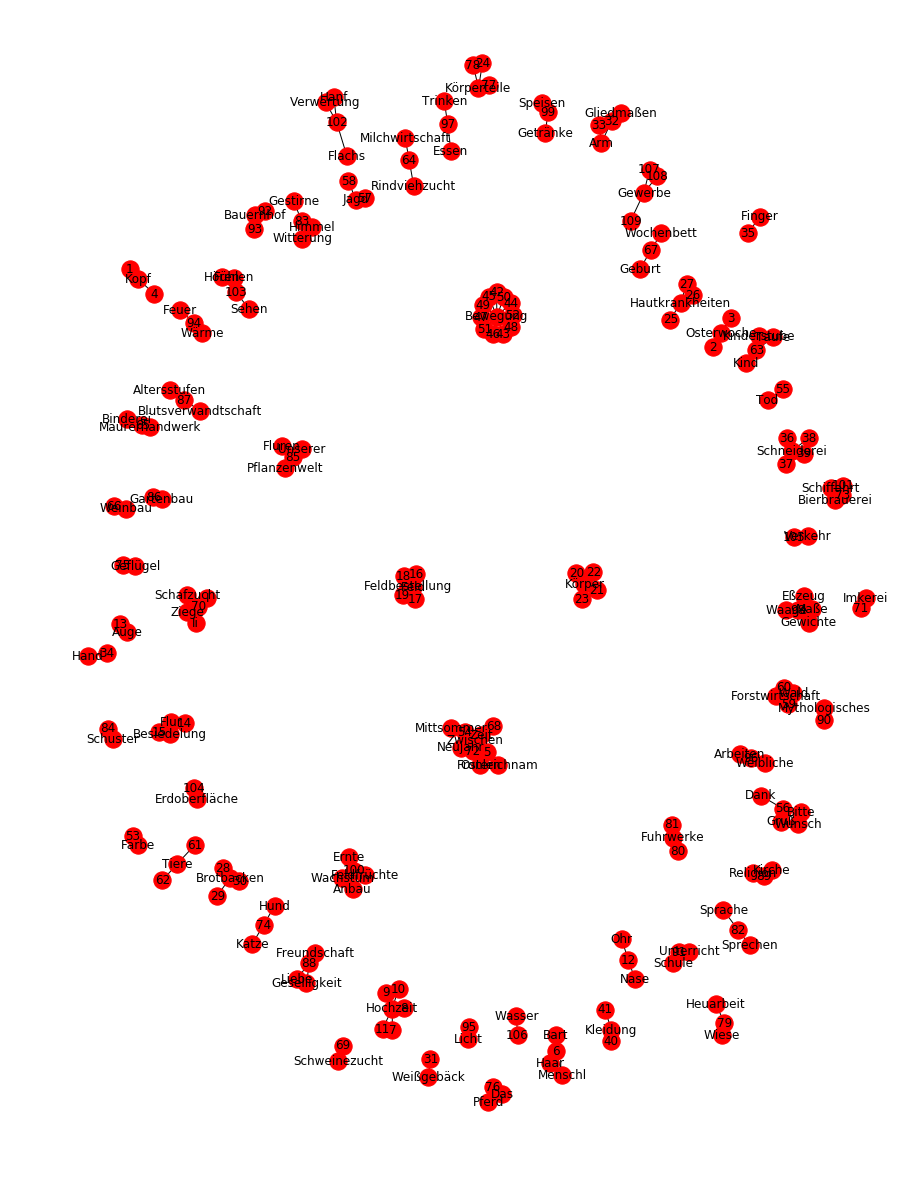

In [98]:
plt.figure(figsize=(12,16))
nx.draw(G, with_labels=True) #, font_weight='bold')